In [3]:
from os.path import join
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
# read shapefiles
path_e_highway_sev2 = join('C:\\Users\\r.beer\\code\\FINE\\examples\\EU_without_aggregation\\InputData\\SpatialData\\'
                           'ShapeFiles\\e-highway_sev2.shp')
path_e_highway_sev_full = join('C:\\Users\\r.beer\\code\\FINE\\examples\\EU_without_aggregation\\InputData\\'
                               'SpatialData\\ShapeFiles\\e-highway_sev-full.shp')

e_highway_sev2 = gpd.read_file(path_e_highway_sev2)
path_e_highway_sev_full = gpd.read_file(path_e_highway_sev_full)



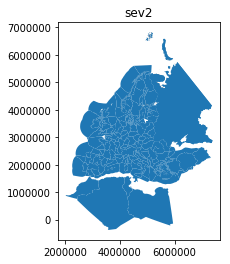

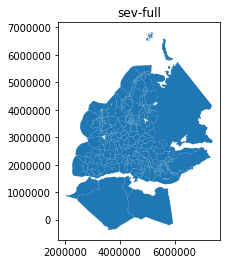

In [46]:
# raw shapefile visualization
e_highway_sev2.plot()
plt.title('sev2')
path_e_highway_sev_full.plot()
plt.title('sev-full')


plt.show()


In [48]:
list_of_states = list(e_highway_sev2.ISO.unique())

list_of_states

list_of_interesting_states = [state for state in list_of_states if state not in ('TUR', 'None')]

list_of_interesting_states

['ESP',
 'PRT',
 'FRA',
 'BEL',
 'LUX',
 'NLD',
 'DEU',
 'DNK',
 'CZE',
 'POL',
 'SVK',
 'CHE',
 'AUT',
 'ITA',
 'SVN',
 'HUN',
 'ROU',
 'HRV',
 'BIH',
 'MNE',
 'SRB',
 'BGR',
 'MKD',
 'GRC',
 'ALB',
 'EST',
 'FIN',
 'LTU',
 'LVA',
 'NOR',
 'SWE',
 'GBR',
 'IRL']

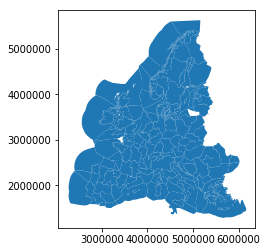

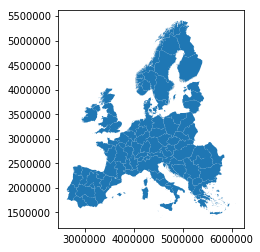

In [45]:
# with offshore
e_highway_sev2[e_highway_sev2.ISO.isin(list_of_interesting_states)].plot()

# without offshore
e_highway_sev2[e_highway_sev2.isOffshore == False][e_highway_sev2.ISO.isin(list_of_interesting_states)].plot()


In [86]:
# fig, ax = plt.subplots(1)
e_highway_sev2[e_highway_sev2.isOffshore == False].dissolve(by='ISO')


TopologyException: Input geom 1 is invalid: Self-intersection at or near point 4263655.785373061 2647276.8412613035 at 4263655.785373061 2647276.8412613035


TopologyException: Input geom 1 is invalid: Self-intersection at or near point 4263655.785373061 2647276.8412613035 at 4263655.785373061 2647276.8412613035


TopologyException: Input geom 1 is invalid: Self-intersection at or near point 4263655.785373061 2647276.8412613035 at 4263655.785373061 2647276.8412613035


ValueError: No Shapely geometry can be created from null value

In [26]:
import geokit

e_highway_sev2

#hans = geokit.vector.extractFeatures(path_e_highway_sev2)
#vectmp = geokit.vector.createVector(hans[hans.ISO == 'DEU'], output='tmp.shp')
#var = geokit.RegionMask.load(vectmp, limitOne=False)

var = geokit.RegionMask.load(path_e_highway_sev2, where="ISO='DEU' AND isOffshore=0", limitOne=False)

In [27]:
var.buildMask()
var.buildGeometry()

geom = var.geometry

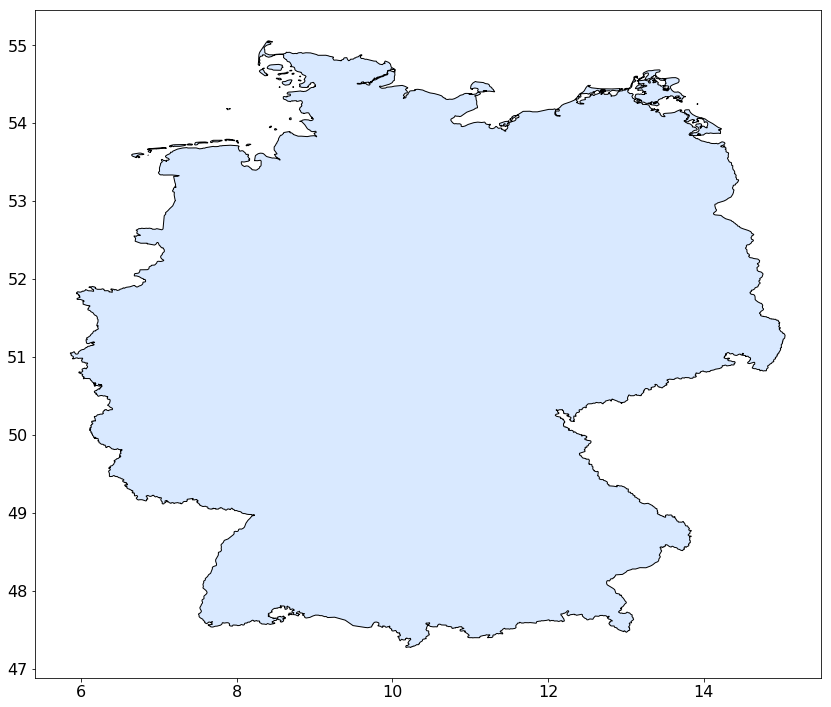

In [28]:
geokit.drawGeoms(geom)
plt.show()

In [29]:
geom.ExportToWKT()

AttributeError: type object 'object' has no attribute '__getattr__'

In [64]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world[world.iso_a3 == 'RUS']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
135,140041247.0,Europe,Russia,RUS,2266000.0,(POLYGON ((143.6480074403629 50.74760040954152...


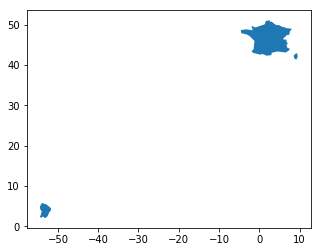

In [62]:
world[world.iso_a3.isin(list_of_interesting_states)][world.name == 'France'].plot()



In [75]:
import geokit as gk
import matplotlib.pyplot as plt

gk._test_data_

OrderedDict([('aachenShapefile.dbf',
              'c:\\users\\r.beer\\code\\git_repos\\geokit\\geokit\\test\\data\\aachenShapefile.dbf'),
             ('aachenShapefile.prj',
              'c:\\users\\r.beer\\code\\git_repos\\geokit\\geokit\\test\\data\\aachenShapefile.prj'),
             ('aachenShapefile.qpj',
              'c:\\users\\r.beer\\code\\git_repos\\geokit\\geokit\\test\\data\\aachenShapefile.qpj'),
             ('aachenShapefile.shp',
              'c:\\users\\r.beer\\code\\git_repos\\geokit\\geokit\\test\\data\\aachenShapefile.shp'),
             ('aachenShapefile.shx',
              'c:\\users\\r.beer\\code\\git_repos\\geokit\\geokit\\test\\data\\aachenShapefile.shx'),
             ('aachen_buildings.dbf',
              'c:\\users\\r.beer\\code\\git_repos\\geokit\\geokit\\test\\data\\aachen_buildings.dbf'),
             ('aachen_buildings.prj',
              'c:\\users\\r.beer\\code\\git_repos\\geokit\\geokit\\test\\data\\aachen_buildings.prj'),
             ('aachen_b

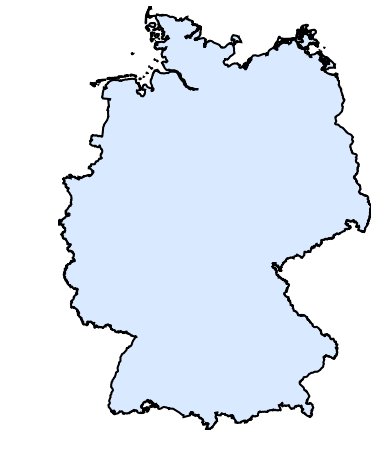

In [74]:
geoms = rm.extractFeatures(gk._test_data_["Europe_with_H2MobilityData_GermanyClip.shp"])
axh = rm.drawGeoms(geoms, figsize=(5, 6), hideAxis=True, color='b')
plt.show()